# <center> Análisis Exploratorio de Datos</center>

Revision de la data

In [1]:
# Librerias a utilizar
import pandas as pd
import sketch
import matplotlib.pyplot as plt
import dtale.app as dtale_app
import sweetviz as sv
from ydata_profiling import ProfileReport
import warnings
import dtale
import missingno as msno
from unidecode import unidecode
from wordcloud import WordCloud
import seaborn as sns
import ast
import re

In [2]:
# Carga de la data
df = pd.read_csv("../datasets/movies_etl.csv")

In [3]:
# Visualizacion de las caracterisitcas de los datos
# Cantidad de columnas y filas en la data y el tipo de data

print(df.shape)
print(type(df))
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df.head(2)

(45376, 21)
<class 'pandas.core.frame.DataFrame'>


belongs_to_collection    budget                    genres    id original_language                  overview  popularity      production_companies      production_countries release_date      revenue  runtime         spoken_languages    status                   tagline      title  vote_average  year      month      day  return
0  Toy Story Collection  30000000  ['Animation', 'Comedy...   862                en  Led by Woody, Andy's ...   21.946943  ['Pixar Animation Stu...  ['United States of Am...   1995-10-30  373554033.0     81.0              ['English']  Released                       NaN  Toy Story           7.7  1995    Octubre    Lunes   12.45
1                   NaN  65000000  ['Adventure', 'Fantas...  8844                en  When siblings Judy an...   17.015539  ['TriStar Pictures', ...  ['United States of Am...   1995-12-15  262797249.0    104.0  ['English', 'Français']  Released  Roll the dice and unl...    Jumanji           6.9  1995  Diciembre  Viernes    4.04

In [4]:
# Cambio del encabezado de la data
nuevos_nombres = {
    'belongs_to_collection': 'coleccion',
    'budget': 'presupuesto',
    'genres': 'genero',
    'id': 'id',
    'original_language': 'idioma_original',
    'overview': 'sinopsis',
    'popularity': 'popular',
    'production_companies': 'cia_productora',
    'production_countries': 'pais',
    'release_date': 'estreno',
    'revenue': 'ganancia',
    'runtime': 'duracion',
    'spoken_languages': 'idioma_hablado',
    'status': 'estado',
    'tagline': 'lema',
    'title': 'titulo',
    'vote_average': 'prom_voto',
    'year': 'anio',
    'month': 'mes',
    'day': 'dia',
    'return': 'retorno'
}

df = df.rename(columns=nuevos_nombres)

In [5]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   coleccion        4488 non-null   object 
 1   presupuesto      45376 non-null  int64  
 2   genero           42992 non-null  object 
 3   id               45376 non-null  int64  
 4   idioma_original  45365 non-null  object 
 5   sinopsis         44435 non-null  object 
 6   popular          45376 non-null  float64
 7   cia_productora   33580 non-null  object 
 8   pais             39165 non-null  object 
 9   estreno          45376 non-null  object 
 10  ganancia         45376 non-null  float64
 11  duracion         45130 non-null  float64
 12  idioma_hablado   41608 non-null  object 
 13  estado           45296 non-null  object 
 14  lema             20398 non-null  object 
 15  titulo           45376 non-null  object 
 16  prom_voto        45376 non-null  float64
 17  anio        

In [6]:
#Obteniendo los valores unicos de cada columna
df.nunique()

coleccion           1695
presupuesto         1223
genero              4064
id                 45346
idioma_original       89
sinopsis           44232
popular            43731
cia_productora     22667
pais                2388
estreno            17333
ganancia            6863
duracion             353
idioma_hablado      1842
estado                 6
lema               20269
titulo             42196
prom_voto             92
anio                 135
mes                   12
dia                    7
retorno             1256
dtype: int64

In [7]:
df.head(3)

coleccion  presupuesto                    genero     id idioma_original                  sinopsis    popular            cia_productora                      pais     estreno     ganancia  duracion           idioma_hablado    estado                      lema            titulo  prom_voto  anio        mes      dia  retorno
0      Toy Story Collection     30000000  ['Animation', 'Comedy...    862              en  Led by Woody, Andy's ...  21.946943  ['Pixar Animation Stu...  ['United States of Am...  1995-10-30  373554033.0      81.0              ['English']  Released                       NaN         Toy Story        7.7  1995    Octubre    Lunes    12.45
1                       NaN     65000000  ['Adventure', 'Fantas...   8844              en  When siblings Judy an...  17.015539  ['TriStar Pictures', ...  ['United States of Am...  1995-12-15  262797249.0     104.0  ['English', 'Français']  Released  Roll the dice and unl...           Jumanji        6.9  1995  Diciembre  Viernes     4.04
2  Grumpy Old Men Collec...            0     ['Romance', 'Comedy']  15602              en  A family wedding reig...  11.712900  ['Warner Bros.', 'Lan...  ['United States of Am...  1995-12-22          0.0     101.0              ['English']  Released  Still Yelling. Still ...  Grumpier Old Men        6.5  1995  Diciembre  Viernes     0.00

In [8]:
df.describe()

presupuesto             id       popular      ganancia      duracion     prom_voto          anio       retorno
count  4.537600e+04   45376.000000  45376.000000  4.537600e+04  45130.000000  45376.000000  45376.000000  4.537600e+04
mean   4.232604e+06  108027.103094      2.926458  1.123010e+07     94.181675      5.624070   1991.881193  6.600428e+02
std    1.743986e+07  112168.377996      6.009672  6.438996e+07     38.341059      1.915423     24.055360  7.469329e+04
min    0.000000e+00       2.000000      0.000000  0.000000e+00      0.000000      0.000000   1874.000000  0.000000e+00
25%    0.000000e+00   26385.750000      0.388840  0.000000e+00     85.000000      5.000000   1978.000000  0.000000e+00
50%    0.000000e+00   59857.500000      1.130454  0.000000e+00     95.000000      6.000000   2001.000000  0.000000e+00
75%    0.000000e+00  156533.500000      3.691695  0.000000e+00    107.000000      6.800000   2010.000000  0.000000e+00
max    3.800000e+08  469172.000000    547.488298  2.787965e+09   1256.000000     10.000000   2020.000000  1.239638e+07

In [9]:
df.describe(include ='all')

coleccion   presupuesto     genero             id idioma_original            sinopsis       popular            cia_productora                      pais     estreno      ganancia      duracion idioma_hablado    estado                    lema      titulo     prom_voto          anio    mes      dia       retorno
count              4488  4.537600e+04      42992   45376.000000           45365               44435  45376.000000                     33580                     39165       45376  4.537600e+04  45130.000000          41608     45296                   20398       45376  45376.000000  45376.000000  45376    45376  4.537600e+04
unique             1695           NaN       4064            NaN              89               44232           NaN                     22667                      2388       17333           NaN           NaN           1842         6                   20269       42196           NaN           NaN     12        7           NaN
top     The Bowery Boys           NaN  ['Drama']            NaN              en  No overview found.           NaN  ['Metro-Goldwyn-Mayer...  ['United States of Am...  2008-01-01           NaN           NaN    ['English']  Released  Based on a true story.  Cinderella           NaN           NaN  Enero  Viernes           NaN
freq                 29           NaN       4998            NaN           32202                 133           NaN                       742                     17846         136           NaN           NaN          22380     44936                       7          11           NaN           NaN   5912    13908           NaN
mean                NaN  4.232604e+06        NaN  108027.103094             NaN                 NaN      2.926458                       NaN                       NaN         NaN  1.123010e+07     94.181675            NaN       NaN                     NaN         NaN      5.624070   1991.881193    NaN      NaN  6.600428e+02
std                 NaN  1.743986e+07        NaN  112168.377996             NaN                 NaN      6.009672                       NaN                       NaN         NaN  6.438996e+07     38.341059            NaN       NaN                     NaN         NaN      1.915423     24.055360    NaN      NaN  7.469329e+04
min                 NaN  0.000000e+00        NaN       2.000000             NaN                 NaN      0.000000                       NaN                       NaN         NaN  0.000000e+00      0.000000            NaN       NaN                     NaN         NaN      0.000000   1874.000000    NaN      NaN  0.000000e+00
25%                 NaN  0.000000e+00        NaN   26385.750000             NaN                 NaN      0.388840                       NaN                       NaN         NaN  0.000000e+00     85.000000            NaN       NaN                     NaN         NaN      5.000000   1978.000000    NaN      NaN  0.000000e+00
50%                 NaN  0.000000e+00        NaN   59857.500000             NaN                 NaN      1.130454                       NaN                       NaN         NaN  0.000000e+00     95.000000            NaN       NaN                     NaN         NaN      6.000000   2001.000000    NaN      NaN  0.000000e+00
75%                 NaN  0.000000e+00        NaN  156533.500000             NaN                 NaN      3.691695                       NaN                       NaN         NaN  0.000000e+00    107.000000            NaN       NaN                     NaN         NaN      6.800000   2010.000000    NaN      NaN  0.000000e+00
max                 NaN  3.800000e+08        NaN  469172.000000             NaN                 NaN    547.488298                       NaN                       NaN         NaN  2.787965e+09   1256.000000            NaN       NaN                     NaN         NaN     10.000000   2020.000000    NaN      NaN  1.239638e+07

# EDA

### 1. Correción de las columnas ganancia y presupuesto, de dolares a millones

In [10]:
# Dividir la columna "ganancia" por 1,000,000 para convertir a millones de dólares
df['ganancia'] = df['ganancia'] / 1000000

# Renombrar la columna "ganancia" a "ganancia (millones)"
df = df.rename(columns={'ganancia': 'ganancia (mill)'})

# Dividir la columna "preupuesto" por 1,000,000 para convertir a millones de dólares
df['presupuesto'] = df['presupuesto'] / 1000000
# Renombrar la columna "presupuesto" a "presupuesto (millones)"
df = df.rename(columns={'presupuesto': 'presupuesto (mill)'})

### a. Verificando los datos faltantes

In [11]:
# Verificacion de valores vacíos o nulos
df.isnull().sum()

coleccion             40888
presupuesto (mill)        0
genero                 2384
id                        0
idioma_original          11
sinopsis                941
popular                   0
cia_productora        11796
pais                   6211
estreno                   0
ganancia (mill)           0
duracion                246
idioma_hablado         3768
estado                   80
lema                  24978
titulo                    0
prom_voto                 0
anio                      0
mes                       0
dia                       0
retorno                   0
dtype: int64

In [12]:
df.isnull()

coleccion  presupuesto (mill)  genero     id  idioma_original  sinopsis  popular  cia_productora   pais  estreno  ganancia (mill)  duracion  idioma_hablado  estado   lema  titulo  prom_voto   anio    mes    dia  retorno
0          False               False   False  False            False     False    False           False  False    False            False     False           False   False   True   False      False  False  False  False    False
1           True               False   False  False            False     False    False           False  False    False            False     False           False   False  False   False      False  False  False  False    False
2          False               False   False  False            False     False    False           False  False    False            False     False           False   False  False   False      False  False  False  False    False
3           True               False   False  False            False     False    False           False  False    False            False     False           False   False  False   False      False  False  False  False    False
4          False               False   False  False            False     False    False           False  False    False            False     False           False   False  False   False      False  False  False  False    False
...          ...                 ...     ...    ...              ...       ...      ...             ...    ...      ...              ...       ...             ...     ...    ...     ...        ...    ...    ...    ...      ...
45371       True               False   False  False            False     False    False           False  False    False            False     False           False   False   True   False      False  False  False  False    False
45372       True               False   False  False            False     False    False           False  False    False            False     False           False   False   True   False      False  False  False  False    False
45373       True               False   False  False            False     False    False           False  False    False            False     False           False   False  False   False      False  False  False  False    False
45374       True               False    True  False            False     False    False           False  False    False            False     False            True   False   True   False      False  False  False  False    False
45375       True               False    True  False            False     False    False            True  False    False            False     False           False   False   True   False      False  False  False  False    False

[45376 rows x 21 columns]

In [13]:
# Determinacion del porcentaje de datos nulos por columna
porc_nulos = df.isnull().sum() * 100 / len(df)
porc_nulos

coleccion             90.109309
presupuesto (mill)     0.000000
genero                 5.253879
id                     0.000000
idioma_original        0.024242
sinopsis               2.073783
popular                0.000000
cia_productora        25.996121
pais                  13.687853
estreno                0.000000
ganancia (mill)        0.000000
duracion               0.542137
idioma_hablado         8.303949
estado                 0.176305
lema                  55.046721
titulo                 0.000000
prom_voto              0.000000
anio                   0.000000
mes                    0.000000
dia                    0.000000
retorno                0.000000
dtype: float64

In [14]:
# Reemplazamos todos los nulos con valores vacios de todas las columnas que tienen NaN

df['coleccion'].fillna('', inplace=True)
df['genero'].fillna('',inplace=True)
df['sinopsis'].fillna('', inplace=True)
df['idioma_original'].fillna('', inplace=True)
df['cia_productora'].fillna('', inplace=True)
df['pais'].fillna('', inplace=True)
df['duracion'].fillna('', inplace=True)
df['idioma_hablado'].fillna('', inplace=True)
df['estado'].fillna('', inplace=True)
df['lema'].fillna('', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coleccion           45376 non-null  object 
 1   presupuesto (mill)  45376 non-null  float64
 2   genero              45376 non-null  object 
 3   id                  45376 non-null  int64  
 4   idioma_original     45376 non-null  object 
 5   sinopsis            45376 non-null  object 
 6   popular             45376 non-null  float64
 7   cia_productora      45376 non-null  object 
 8   pais                45376 non-null  object 
 9   estreno             45376 non-null  object 
 10  ganancia (mill)     45376 non-null  float64
 11  duracion            45376 non-null  object 
 12  idioma_hablado      45376 non-null  object 
 13  estado              45376 non-null  object 
 14  lema                45376 non-null  object 
 15  titulo              45376 non-null  object 
 16  prom

## Exploracion de los datos utilizando la libreria **YDATA PROFILING**

In [18]:
# Vamos a usar el ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

check for duplicate data
Para mantener una sola fila de cada uno de los duplicados en un DataFrame, puedes utilizar el método drop_duplicates() sin especificar ningún parámetro. Esto eliminará todas las filas duplicadas y conservará solo una de ellas.

In [16]:
# Contamos cuantos duplicados existen
duplicados = df.duplicated()
cantidad_duplicados = duplicados.sum()
print("Cantidad de duplicados:", cantidad_duplicados)

Cantidad de duplicados: 17


In [18]:
# Eliminamos los duplicados
df1 = df.drop_duplicates()

In [19]:
# Contamos cuantos duplicados existen
duplicados = df1.duplicated()
cantidad_duplicados2 = duplicados.sum()
print("Cantidad de duplicados:", cantidad_duplicados2)

Cantidad de duplicados: 0


In [22]:
# Cambiar los caracteres solo en las columnas categoricas
def convert_special_characters(item):
    if isinstance(item, str):
        return unidecode(item)
    elif isinstance(item, list):
        return [convert_special_characters(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_special_characters(v) for k, v in item.items()}
    else:
        return item

# Obtener las columnas categóricas
columnas_categoricas = df1.select_dtypes(include=['object']).columns

# Aplicar convert_special_characters solo a las columnas categóricas
df1[columnas_categoricas] = df1[columnas_categoricas].applymap(convert_special_characters)

/tmp/ipykernel_245722/1196623593.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Función recursiva para convertir a minúsculas
def convert_to_lowercase(item):
    if isinstance(item, str):
        return item.lower()
    elif isinstance(item, list):
        return [convert_to_lowercase(x) for x in item]
    elif isinstance(item, dict):
        return {k: convert_to_lowercase(v) for k, v in item.items()}
    else:
        return item

# Obtener las columnas categóricas
columnas_categoricas = df1.select_dtypes(include=['object']).columns

# Aplicar convert_to_lowercase solo a las columnas categóricas
df1[columnas_categoricas] = df1[columnas_categoricas].applymap(convert_to_lowercase)

/tmp/ipykernel_245722/167431262.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Utiliza el método astype() para cambiar el tipo de datos de la columna 'anio' a cadena
df['anio'] = df['anio'].astype(str)

# Después de la conversión
print(df.dtypes)

Explorar la distribución de las variables numéricas utilizando histogramas, gráficos de caja y diagramas de dispersión. Puedes utilizar matplotlib y seaborn para crear visualizaciones, previa clasificacion de datos numericos y categoricos

In [34]:
df['duracion'] = df['duracion'].astype(str)
df['duracion'] = pd.to_numeric(df['duracion'], errors='coerce')

Si la columna "belongs_to_collection" solo indica si una película pertenece o no a una colección y no se tiene información sobre si la película está o no en una colección para los valores NaN, puedes considerar reemplazar los valores NaN por "True". Esto indicaría que la película pertenece a una colección, pero no se tiene información específica sobre cuál es esa colección.

Es importante tener en cuenta que el objetivo principal de tu proyecto es recomendar películas basándose en la similitud de puntuación y no necesariamente en la pertenencia a una colección. Por lo tanto, el enfoque principal debería estar en el análisis de las puntuaciones y similitudes entre las películas, en lugar de la pertenencia a una colección.

In [25]:
# Identificar variables numéricas y categóricas
variables_numericas = df1.select_dtypes(include=['int64', 'float64']).columns
variables_categoricas = df1.select_dtypes(include=['object']).columns

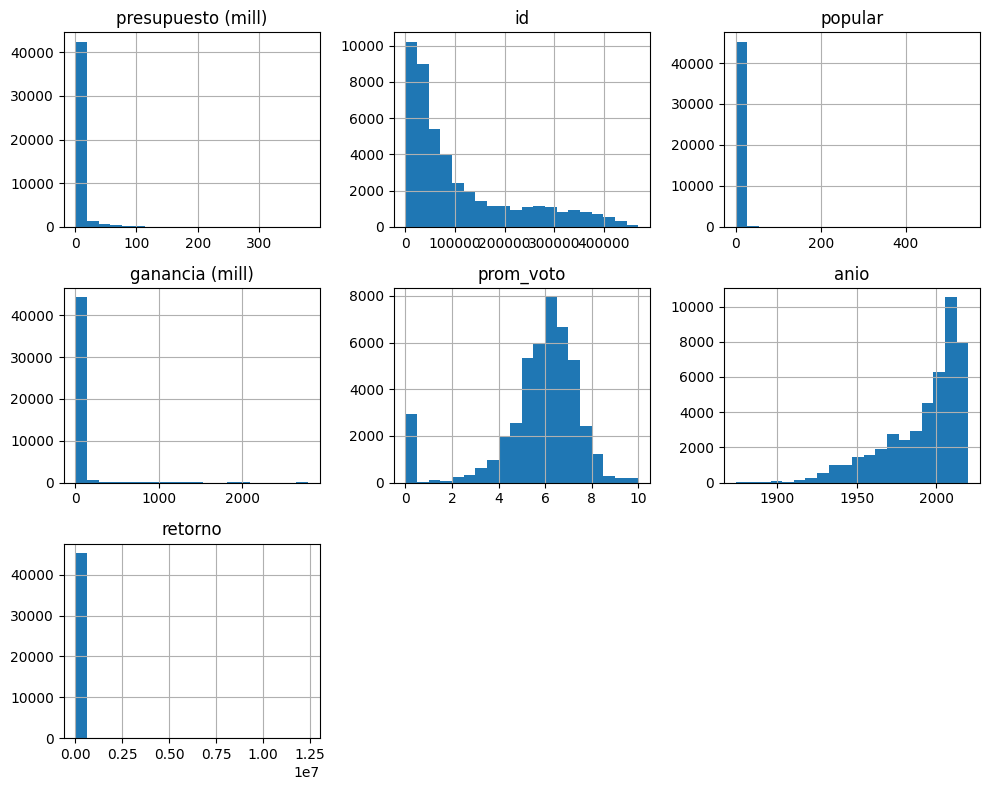

In [26]:

# Histogramas de variables numéricas
df1[variables_numericas].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


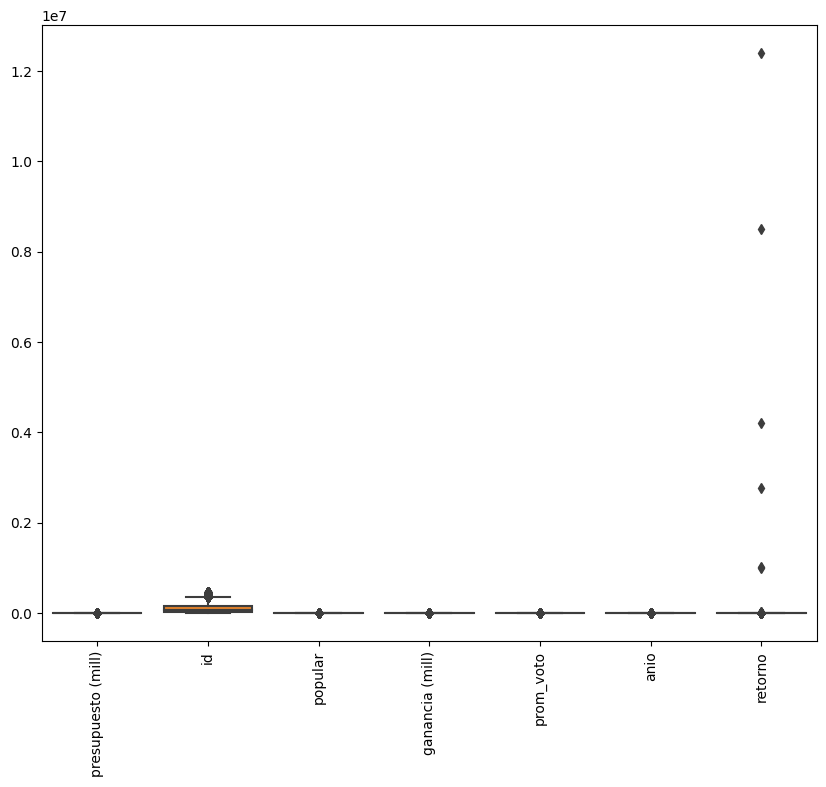

In [30]:

# Gráficos de caja de variables numéricas
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1[variables_numericas])
plt.xticks(rotation=90)
plt.show()

KeyError: 'Type_Main'

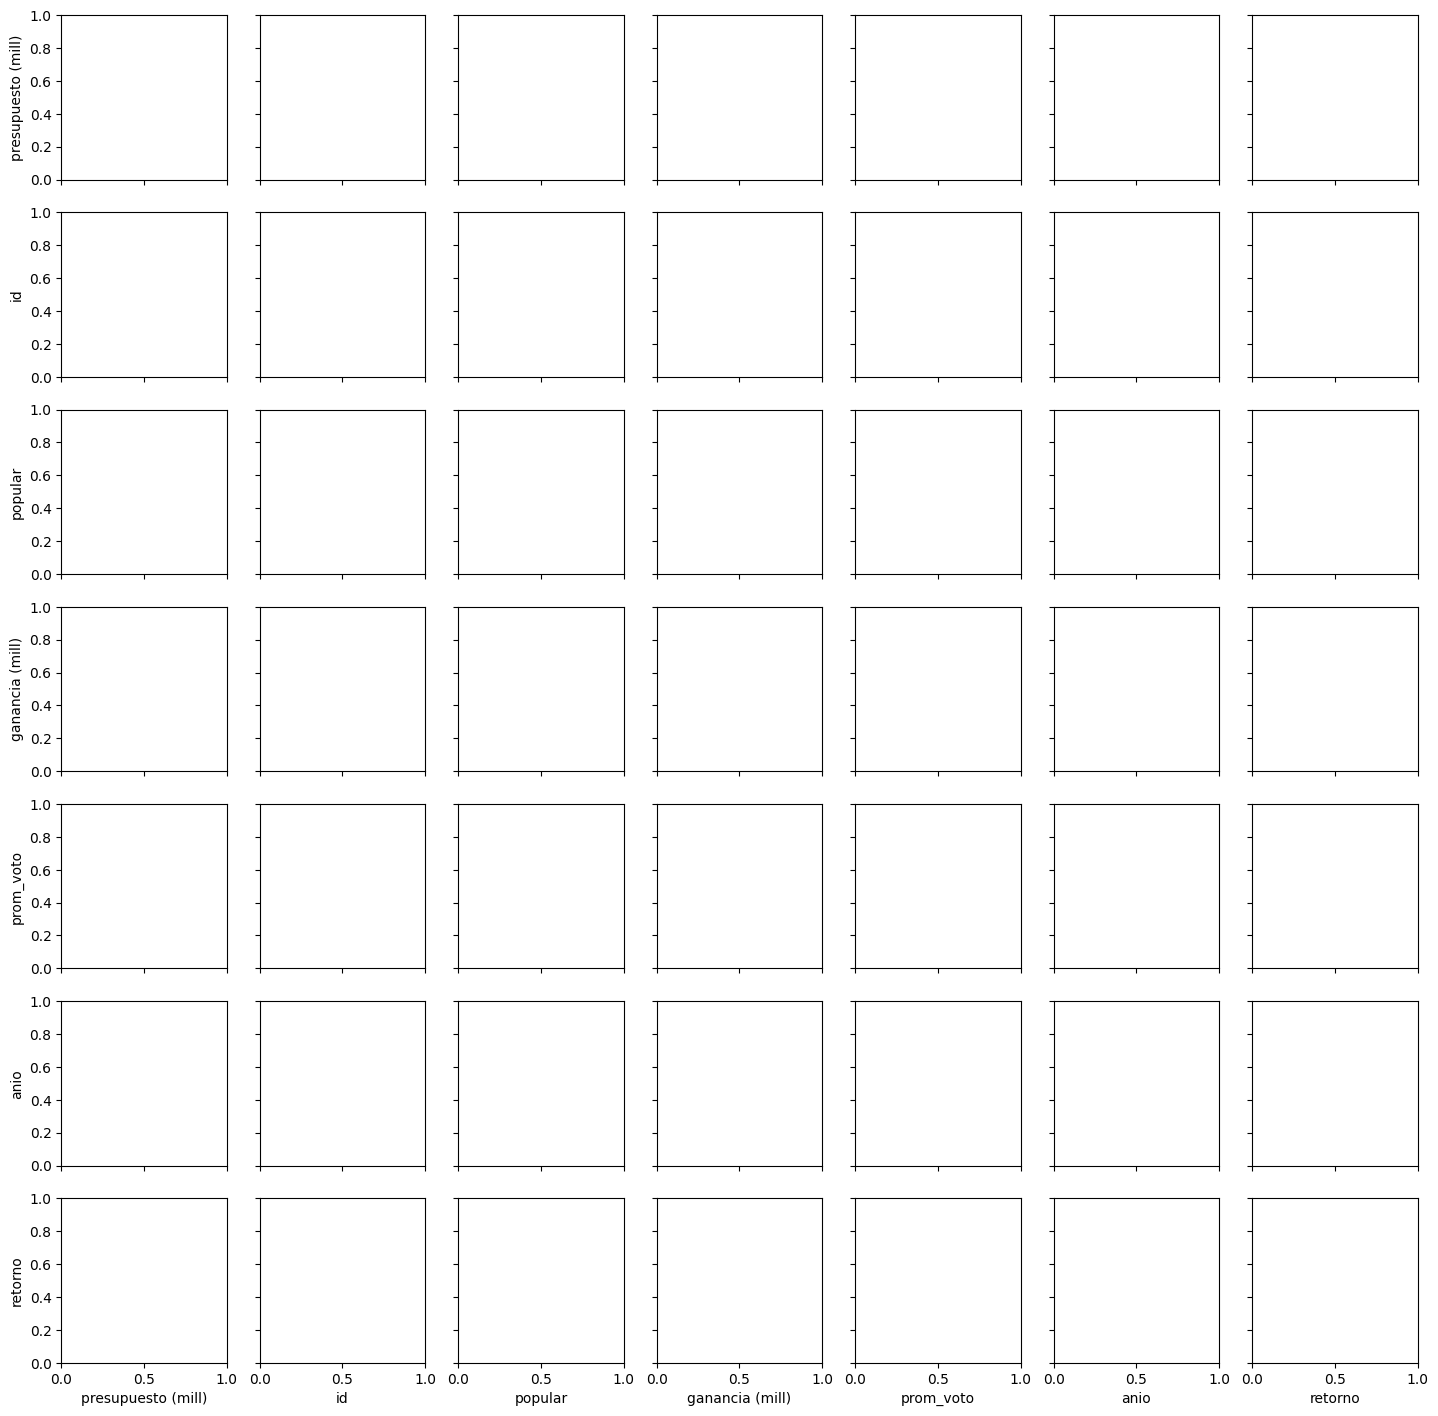

In [57]:
# Diagramas de dispersión de pares de variables numéricas
sns.pairplot(df1[variables_numericas], hue='Type_Main')
plt.show()

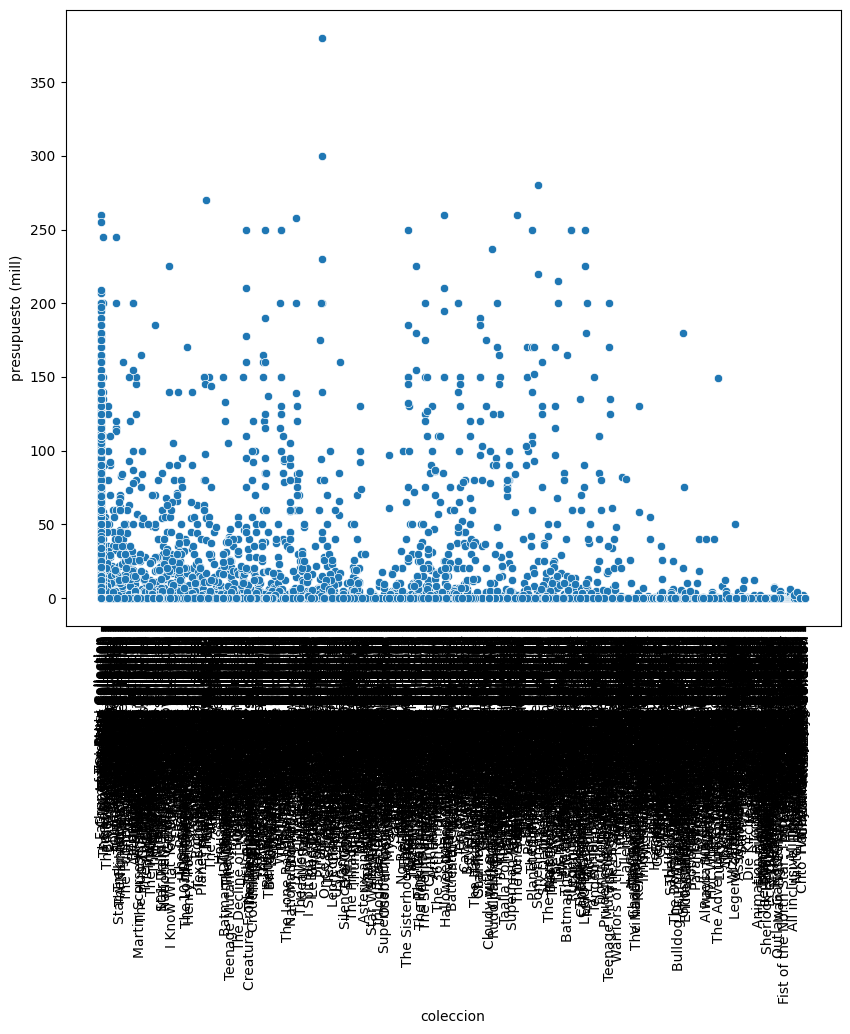

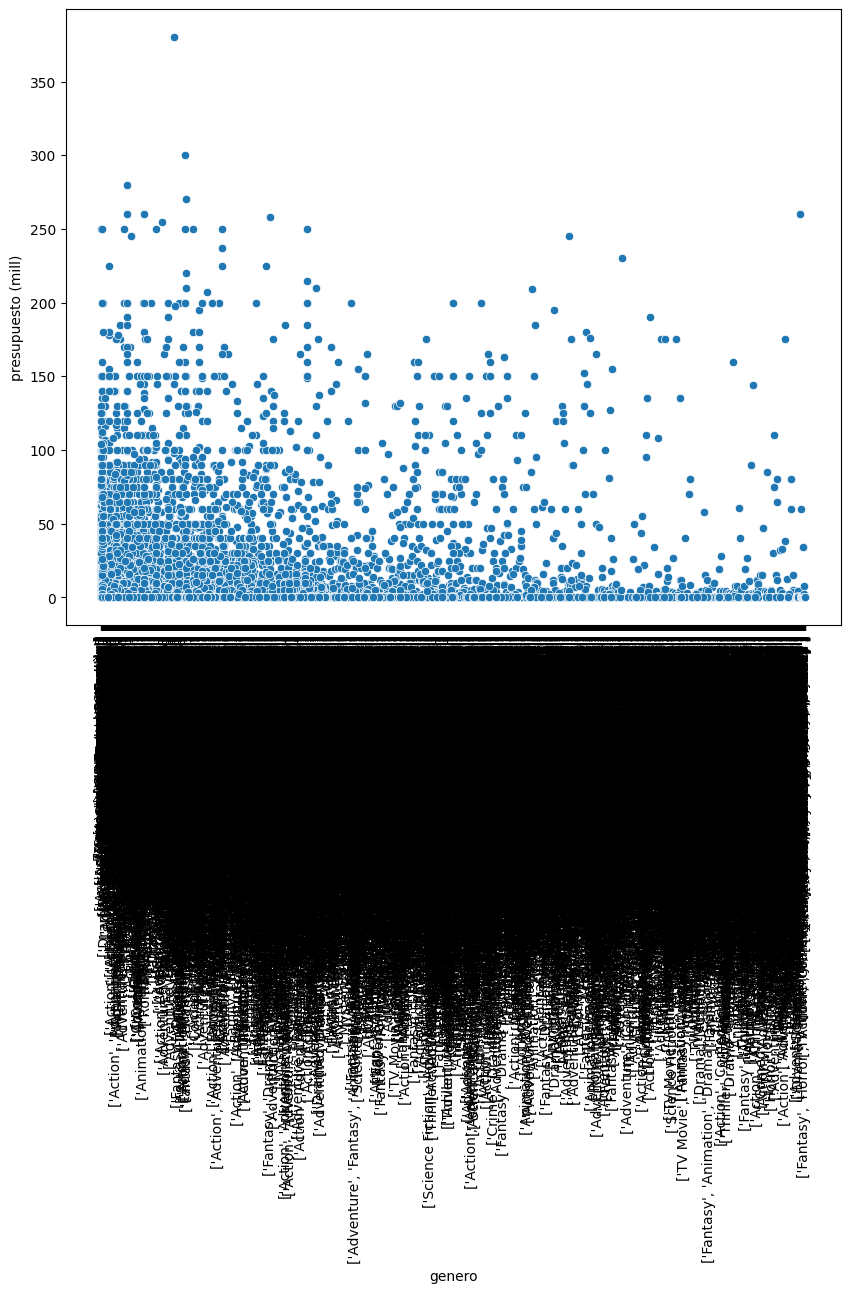

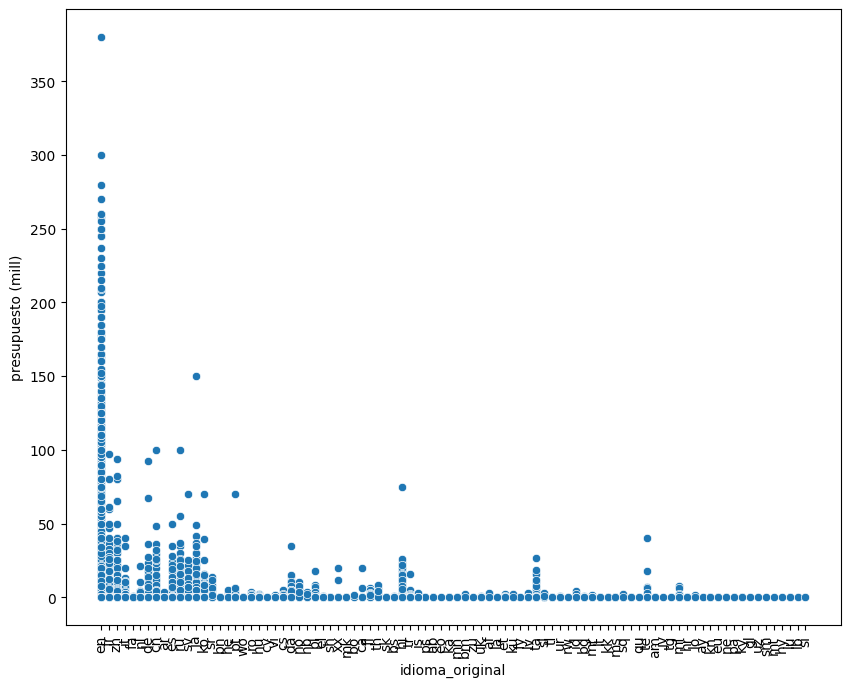

KeyboardInterrupt: 

In [29]:
# Diagramas de dispersión de variables numéricas y categóricas
for variable_cat in variables_categoricas:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=variable_cat, y=variables_numericas[0], data=df1)
    plt.xticks(rotation=90)
    plt.show()

In [32]:
# Calcular la matriz de correlación
correlation_matrix = df1.corr()

/tmp/ipykernel_245722/4078953884.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



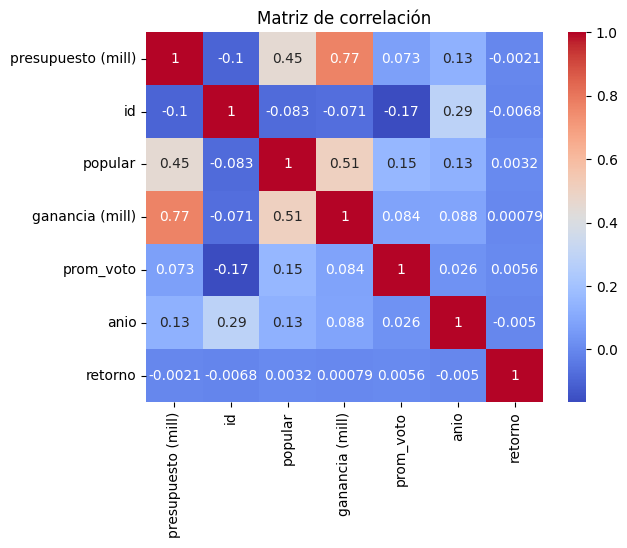

In [33]:
# Visualizar la matriz de correlación como un gráfico de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

AttributeError: PathCollection.set() got an unexpected keyword argument 'X'

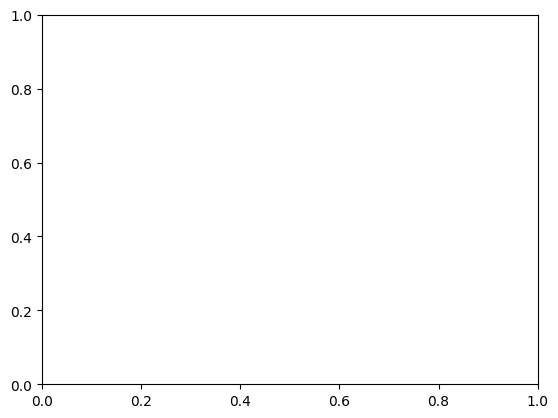

In [61]:
# Crear el diagrama de dispersión
sns.scatterplot(X ='ganancia', y='popular', data=df1)

# Personalizar el gráfico
plt.title('Diagrama de dispersión')
plt.xlabel('Ganancia')
plt.ylabel('Popularidad')

# Mostrar el diagrama de dispersión
plt.show()

In [37]:
# Calcula el promedio de la columna prom_voto
promedio = df1['prom_voto'].mean()

# Reemplaza los valores menores a 1 por el promedio
df1.loc[df1['prom_voto'] < 1, 'prom_voto'] = promedio

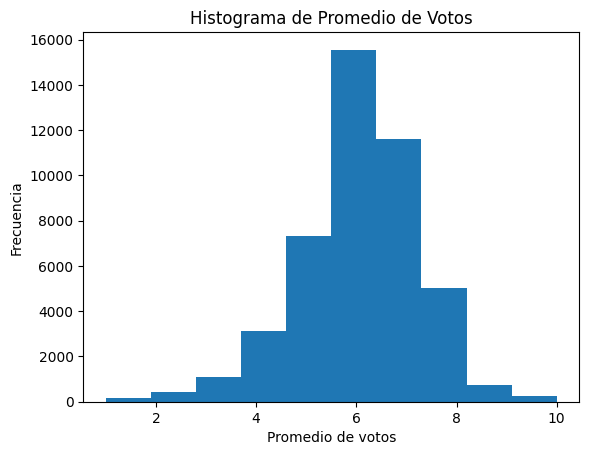

In [38]:
plt.hist(df1['prom_voto'], bins=10)

# Personalizar el gráfico
plt.xlabel('Promedio de votos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Promedio de Votos')

# Mostrar el histograma
plt.show()



## Exploracion de los datos utilizando la libreria **MISSINGNO**


En la grafica se puede observar que se tiene ya no se tienen valores NaN.



<AxesSubplot: >

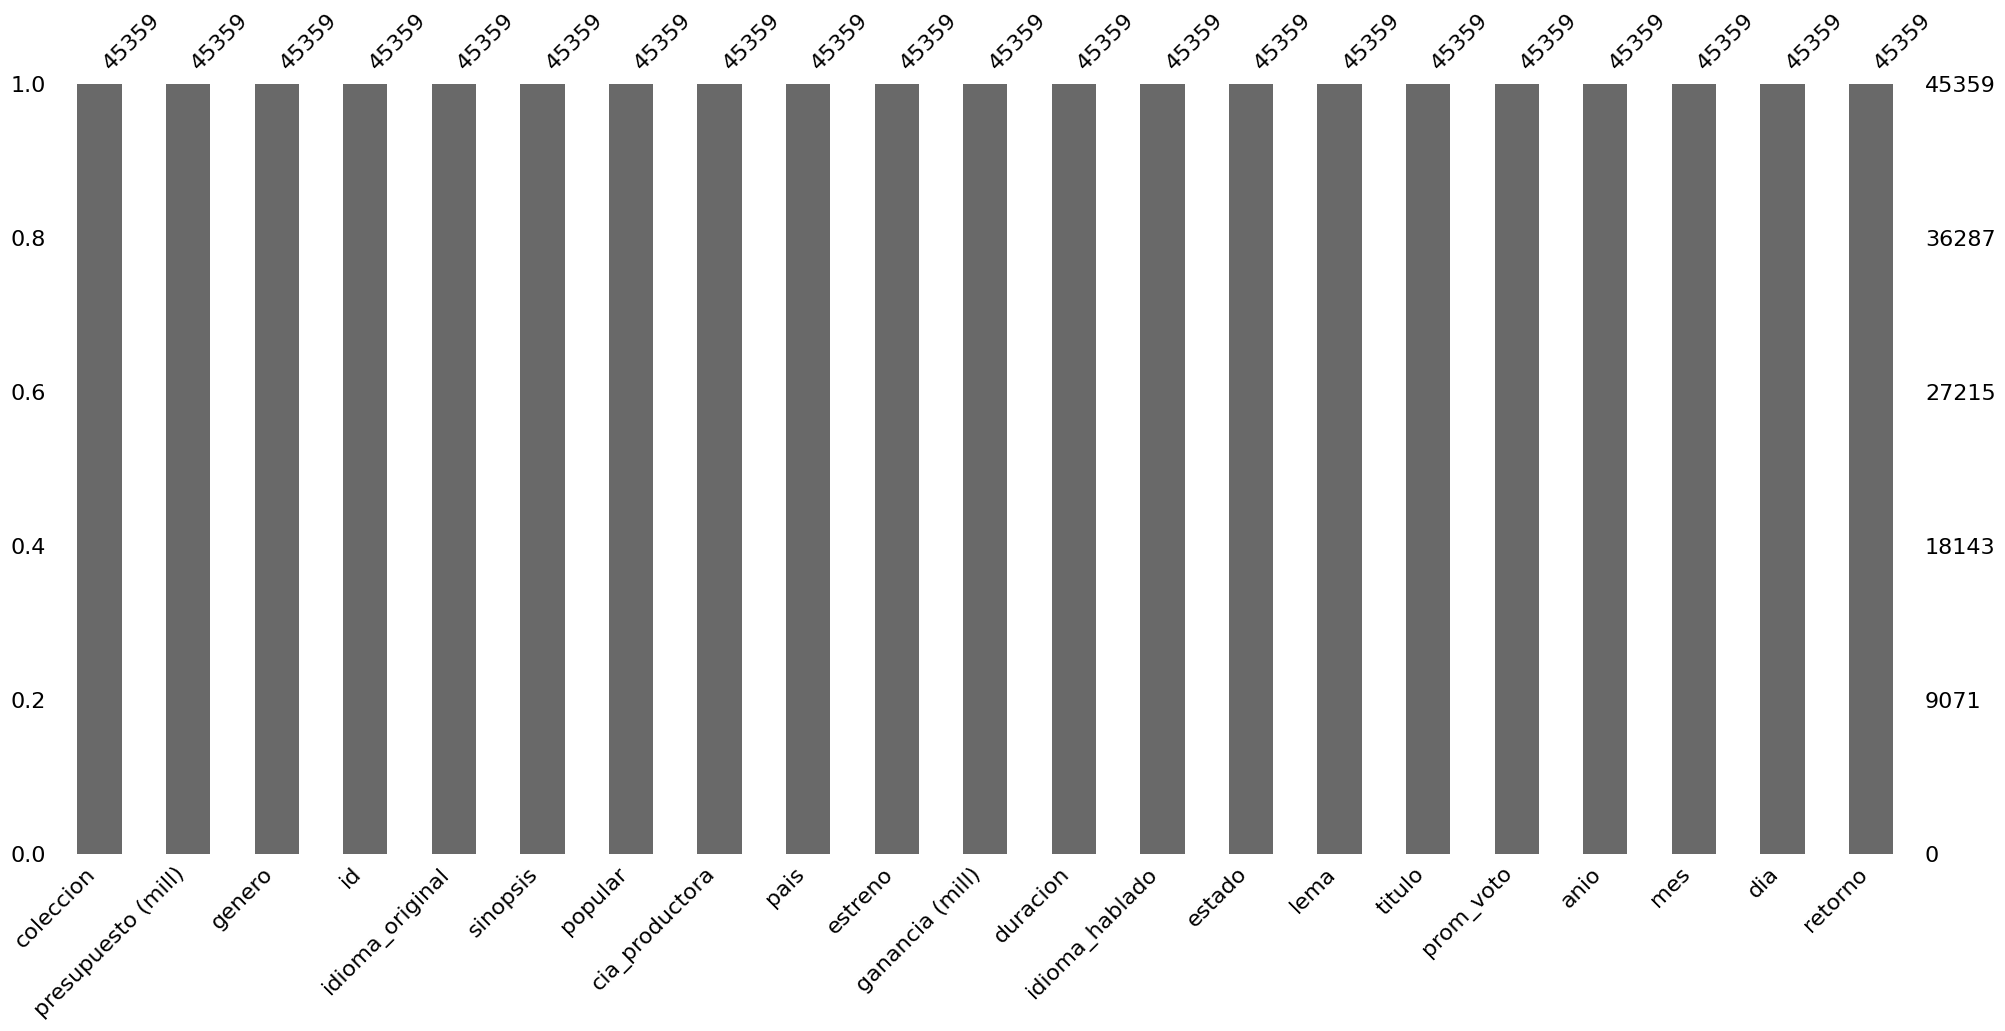

In [39]:
msno.bar(df1)

<AxesSubplot: >

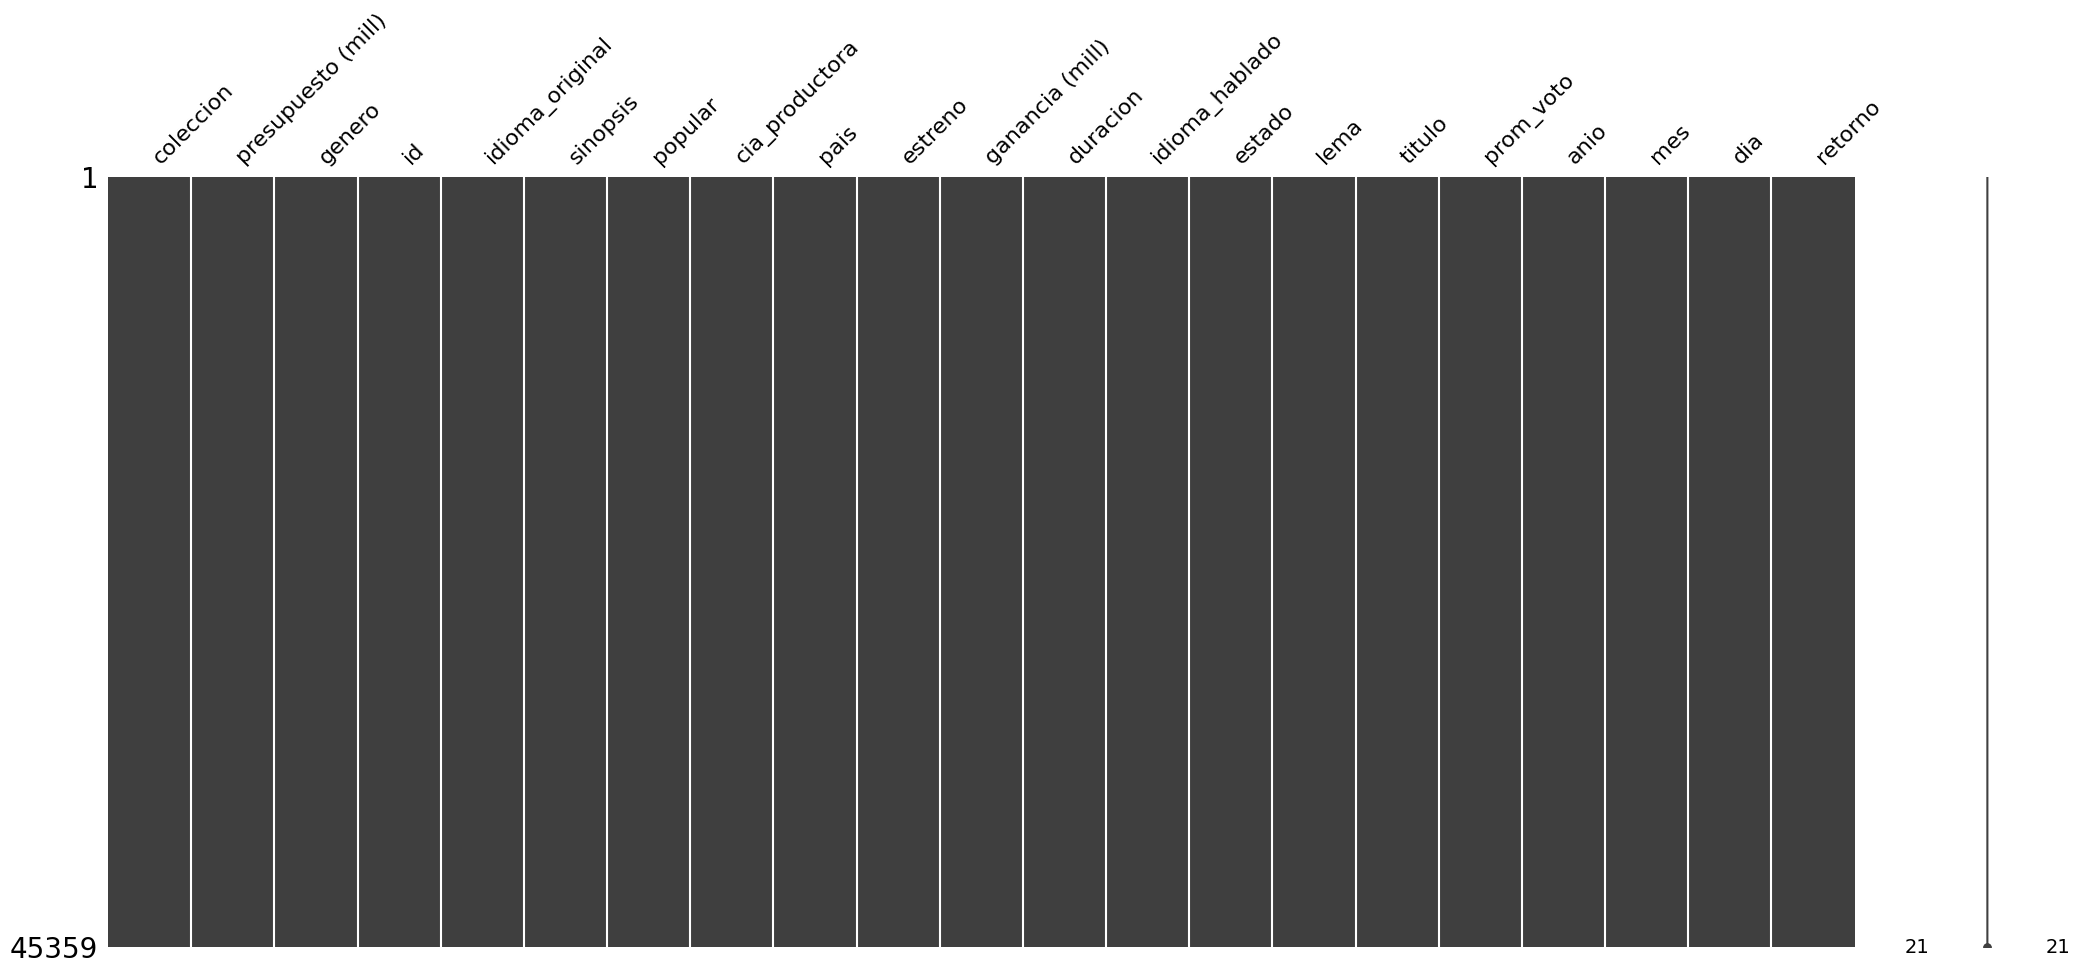

In [40]:
msno.matrix(df1)

In [ ]:
titulo: Nombre de la película.
promedio_votos: Puntuación promedio de la película.

# Generar nubes de palabras (word clouds) para visualizar las palabras más frecuentes en los títulos u otras columnas relevantes. Esto puede ser útil para el desarrollo del sistema de recomendación.

In [42]:
# Unir todos los títulos de las películas en un solo texto
text = ' '.join(df1['titulo'])

In [43]:

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

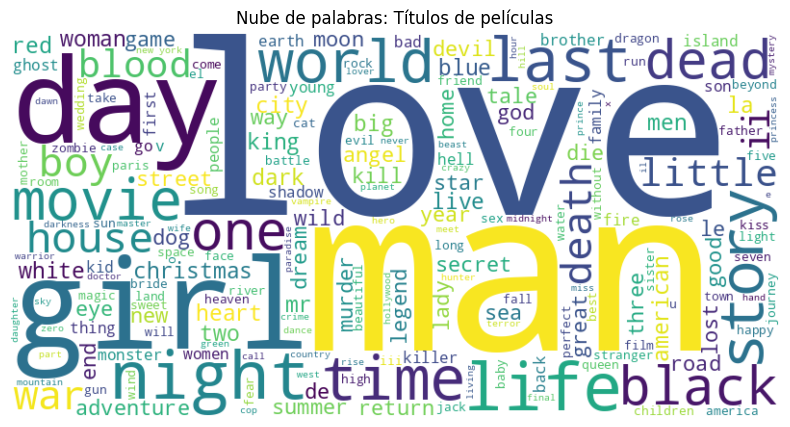

In [44]:
# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras: Títulos de películas')
plt.show()

In [48]:
# Calculo, de los datos atipicos

# Calcular el rango intercuartílico (IQR)
Q1 = df1['retorno'].quantile(0.25)
Q3 = df1['retorno'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

0.0
0.0
0.0


In [49]:


# Definir los límites para identificar los datos atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR



In [50]:
# Identificar los datos atípicos
datos_atipicos = df1[(df1['retorno'] < limite_inferior) | (df1['retorno'] > limite_superior)]


<AxesSubplot: xlabel='retorno'>

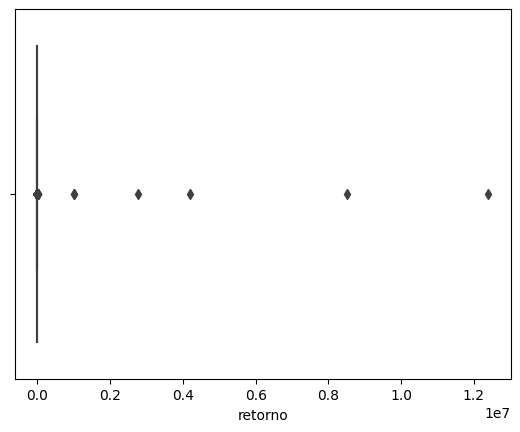

In [51]:

# Visualizar los datos atípicos utilizando un diagrama de caja
sns.boxplot(x=df1['retorno'])

# CONSIGNAS ENCONTRADAS CON LOS DATOS


# 1. mostrar el título de la película que tiene tiempo de ejecución

In [63]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [65]:
df1['duracion'] = pd.to_numeric(df1['duracion'], errors='coerce')
df1[df1['duracion']>= 180]

/tmp/ipykernel_245722/2753365895.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



coleccion  presupuesto (mill)                    genero      id idioma_original                  sinopsis    popular            cia_productora                      pais     estreno  ganancia (mill)  duracion            idioma_hablado    estado                      lema                    titulo  prom_voto  anio         mes      dia  retorno
13                             44.0      ['history', 'drama']   10858              en  an all-star cast powe...   5.092000  ['hollywood pictures'...  ['united states of am...  1995-12-22        13.681765     192.0               ['english']  released  triumphant in victory...                     nixon        7.1  1995   diciembre  viernes     0.31
358                             0.0  ['documentary', 'fore...   41647              en  this documentary reco...   0.568884  ['channel four films'...  ['france', 'united ki...  1993-09-11         0.449707     180.0               ['deutsch']  released                            the wonderful, horrib...        7.3  1993  septiembre   sabado     0.00
378                            63.0  ['drama', 'action', '...   12160              en  covering the life and...   9.277147  ['tig productions', '...  ['united states of am...  1994-06-24        25.052000     191.0               ['english']  released  the epic story of lov...                wyatt earp        6.5  1994       junio  viernes     0.40
522                            22.0  ['drama', 'history', ...     424              en  the true story of how...  41.725123  ['universal pictures'...  ['united states of am...  1993-11-29       321.365567     195.0  ['deutsch', 'polski',...  released  whoever saves one lif...          schindler's list        8.3  1993   noviembre    lunes    14.61
530                             0.0       ['comedy', 'drama']     695              en  multi-storied, fish-e...   8.829337  ['fine line features'...  ['united states of am...  1993-09-05         6.110979     187.0               ['english']  released  short cuts raises the...                short cuts        6.9  1993  septiembre  domingo     0.00
...         ...                 ...                       ...     ...             ...                       ...        ...                       ...                       ...         ...              ...       ...                       ...       ...                       ...                       ...        ...   ...         ...      ...      ...
45131                           0.0                            254689              en  the story of inxs met...   0.132677                                                      2014-02-09         0.000000     180.0               ['english']  released                            never tear us apart: ...        6.0  2014     febrero  domingo     0.00
45160                           0.0  ['comedy', 'drama', '...   66247              ta  muthu starring by raj...   0.252468  ['kavithalayaa produc...                 ['india']  1995-05-05         0.000000     180.0            ['', 'tmilll']  released                                               muthu        6.3  1995        mayo  viernes     0.00
45163                          12.0  ['action', 'comedy', ...   24049              ta  corrupt police and po...   1.323587       ['avm productions']                 ['india']  2007-06-14        19.000000     185.0      ['tmilll', 'telugu']  released                                    sivaji: the boss        6.9  2007       junio   jueves     1.58
45335                           0.0             ['adventure']   42652              ru  a russian version of ...   0.243401   ['odessa film studios']     ['ukraine', 'russia']  1988-01-01         0.000000     270.0               ['pusskii']  released                            the prisoner of if ca...        5.0  1988       enero  viernes     0.00
45372                           0.0                 ['drama']  111109              tl  an artist struggles t...   0.178241           ['sine olivia']           ['philip

In [66]:
df1[df1['duracion']>= 180]['titulo']

13                          nixon
358      the wonderful, horrib...
378                    wyatt earp
522              schindler's list
530                    short cuts
                   ...           
45131    never tear us apart: ...
45160                       muthu
45163            sivaji: the boss
45335    the prisoner of if ca...
45372         century of birthing
Name: titulo, Length: 595, dtype: object

# 2. En que año hubo el mayor promedio de votaciones

In [71]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [69]:
df1.groupby('anio')['prom_voto'].mean().sort_values(ascending=False)

anio
1902    6.900000
1924    6.610256
1923    6.526087
1910    6.371429
1928    6.301515
          ...   
1930    4.103704
1887    4.100000
1892    3.466667
2018    0.000000
2020    0.000000
Name: prom_voto, Length: 135, dtype: float64

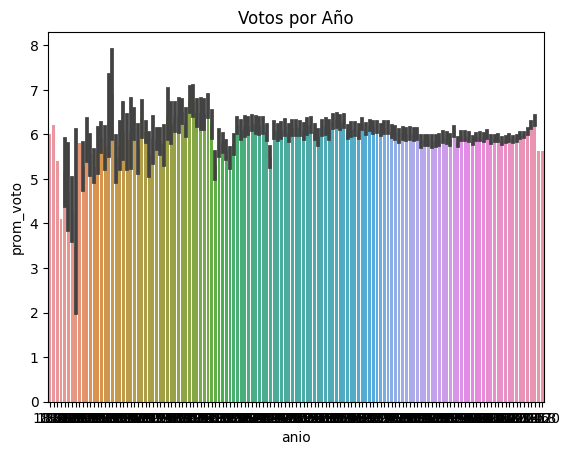

In [72]:
sns.barplot(x='anio', y='prom_voto', data=df1)
plt.title("Votos por Año")
plt.show()

# 3. en qué año hubo el ingreso promedio más alto

In [79]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [80]:
df1.groupby('anio')['ganancia (mill)'].mean().sort_values(ascending=False)

anio
2017    28.338148
2016    19.013639
2003    17.876560
2004    17.808603
1997    17.359758
          ...    
1913     0.000000
1914     0.000000
1917     0.000000
1919     0.000000
2020     0.000000
Name: ganancia (mill), Length: 135, dtype: float64

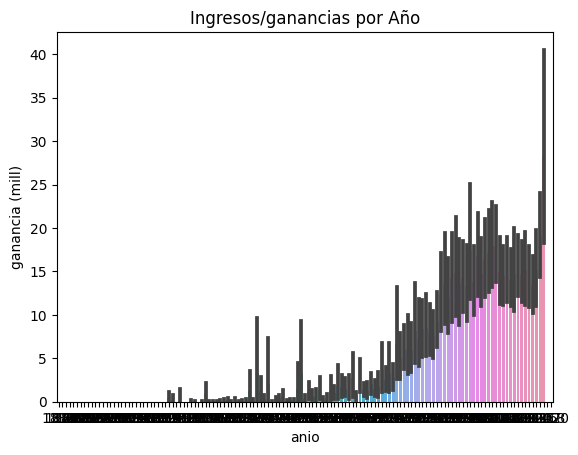

In [82]:
sns.barplot(x='anio', y='ganancia (mill)', data=df1)
plt.title("Ingresos/ganancias por Año")
plt.show()

# 4. Encuentre la calificación promedio para cada director

In [83]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [84]:
df1.groupby('cia_productora')['prom_voto'].mean()

cia_productora
                                                                                                 5.877125
["'a' production committee"]                                                                     5.624176
["ali'n productions"]                                                                            7.500000
["anarchist's convention films"]                                                                 5.650000
["archer's mark"]                                                                                7.500000
                                                                                                   ...   
['zweites deutsches fernsehen (zdf)', 'zdf productions', 'zdf/arte', 'zdf', 'zdf television']    5.624176
['zweites deutsches fernsehen (zdf)']                                                            6.200000
['zygote films', 'upian']                                                                        6.000000
['zyzak film company']         

# 5. Mostrar el título y el tiempo de ejecución de las 10 películas más largas

In [85]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [86]:
df1.nlargest(10,'duracion')

coleccion  presupuesto (mill)                    genero      id idioma_original                  sinopsis    popular            cia_productora                      pais     estreno  ganancia (mill)  duracion idioma_hablado    estado                      lema                    titulo  prom_voto  anio         mes      dia  retorno
24149                           0.0      ['drama', 'history']   67493              en  the economic and cult...   0.664727  ['universal television']  ['united states of am...  1978-10-01              0.0    1256.0                 released                                          centennial        7.9  1978     octubre  domingo      0.0
19947                           0.0           ['documentary']  142051              en  a survey of the music...   1.507756                                                      2001-01-09              0.0    1140.0                 released                                                jazz        5.7  2001       enero   martes      0.0
40873                           0.0           ['documentary']  126820              en  chronicles the sport'...   0.145073                                                      1994-09-18              0.0    1140.0    ['english']  released                                            baseball        8.5  1994  septiembre  domingo      0.0
13762                           0.0                 ['drama']   45560              de  berlin alexanderplatz...   2.255785  ['bavaria film', 'wes...      ['germany', 'italy']  1980-08-28              0.0     931.0    ['deutsch']  released                               berlin alexanderplatz        8.4  1980      agosto   jueves      0.0
13947                           0.0      ['drama', 'history']   67463              de  this epic tale of a f...   0.016204                                         ['germany']  1984-09-16              0.0     925.0                 released                            heimat: a chronicle o...        9.0  1984  septiembre  domingo      0.0
27824                           0.0           ['documentary']  125336              en  the story of film: an...   1.502510                                  ['united kingdom']  2011-09-03              0.0     900.0    ['english']  released                            the story of film: an...        8.8  2011  septiembre   sabado      0.0
26652                           0.0       ['science fiction']  150004              en  taken spans five deca...  10.628230        ['dreamworks skg']  ['united states of am...  2002-12-02              0.0     877.0    ['english']  released  some secrets we keep....                     taken        7.4  2002   diciembre    lunes      0.0
19144                           0.0  ['documentary', 'hist...  208988              en  the war is a seven ep...   0.487489                   ['pbs']  ['united states of am...  2007-09-23              0.0     874.0    ['english']  released                                             the war        5.3  2007  septiembre  domingo      0.0
34622                           0.0  ['history', 'document...  293603              en  a documentary that we...   0.824032      ['florentine films']  ['united states of am...  2014-09-15              0.0     840.0    ['english']  released                            the roosevelts: an in...        8.3  2014  septiembre    lunes      0.0
34687                           0.0  ['adventure', 'drama'...   38430              ru  the series is based o...   0.977018                                          ['russia']  1973-01-01              0.0     840.0    ['pusskii']  released                            seventeen moments in ...        7.4  1973       enero    lunes      0.0

In [87]:
top10_len = df1.nlargest(10,'duracion')[['titulo','duracion']].set_index('titulo')
top10_len

duracion
titulo                             
centennial                   1256.0
jazz                         1140.0
baseball                     1140.0
berlin alexanderplatz         931.0
heimat: a chronicle of...     925.0
the story of film: an ...     900.0
taken                         877.0
the war                       874.0
the roosevelts: an int...     840.0
seventeen moments in s...     840.0

<AxesSubplot: xlabel='duracion', ylabel='titulo'>

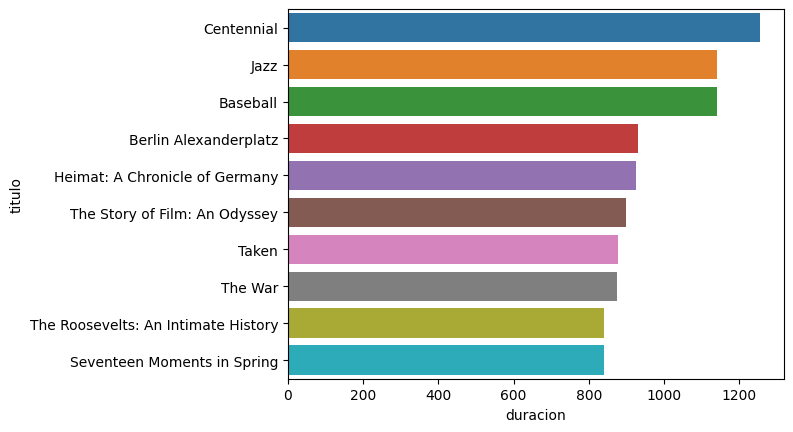

In [91]:
sns.barplot(x='duracion',y=top10_len.index,data=top10_len)

# 6. mostrar el número de películas por año

In [88]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [89]:
df1['anio'].value_counts()

2014    1973
2015    1904
2013    1888
2012    1722
2011    1667
        ... 
2020       1
1887       1
1878       1
1874       1
1883       1
Name: anio, Length: 135, dtype: int64

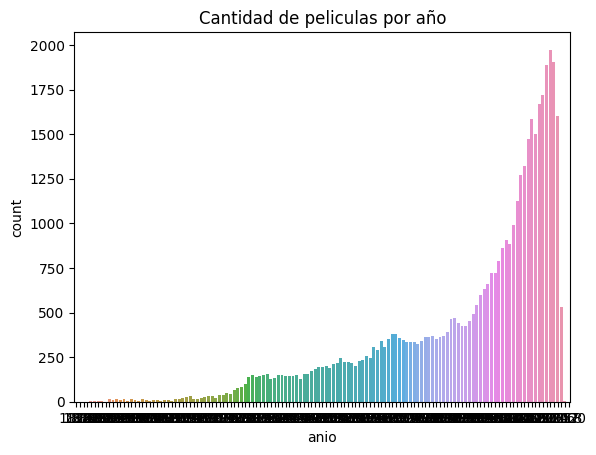

In [90]:
sns.countplot(x='anio',data=df1)
plt.title("Cantidad de peliculas por año")
plt.show()

# 7. Encontrar el título de la película más popular (con mayores ingresos/ganancias)

In [91]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [96]:
df1['ganancia (mill)'].max()

2787.965087

In [97]:
df1[df1['ganancia (mill)'].max()==df1['ganancia (mill)']]

coleccion  presupuesto (mill)                    genero     id idioma_original                  sinopsis     popular            cia_productora                      pais     estreno  ganancia (mill)  duracion          idioma_hablado    estado                      lema  titulo  prom_voto  anio        mes     dia  retorno
14545  avatar collection               237.0  ['action', 'adventure...  19995              en  in the 22nd century, ...  185.070892  ['ingenious film part...  ['united states of am...  2009-12-10      2787.965087     162.0  ['english', 'espanol']  released  enter the world of pa...  avatar        7.2  2009  diciembre  jueves    11.76

In [98]:
df1[df1['ganancia (mill)'].max()==df1['ganancia (mill)']]['titulo']

14545    avatar
Name: titulo, dtype: object

# 8. Mostrar los 10 títulos de películas mejor calificados y sus directores

In [99]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [101]:
top10_len= df1.nlargest(10,'prom_voto')[['titulo','prom_voto','genero']].set_index('titulo')

In [102]:
top10_len

prom_voto                    genero
titulo                                                        
reckless                        10.0  ['fantasy', 'comedy',...
girl in the cadillac            10.0  ['romance', 'adventur...
the haunted world of e...       10.0           ['documentary']
carmen miranda: banana...       10.0           ['documentary']
other voices other rooms        10.0                 ['drama']
dancer, texas pop. 81           10.0  ['comedy', 'drama', '...
the farmer's wife               10.0                 ['drama']
stiff upper lips                10.0                ['comedy']
ten benny                       10.0       ['drama', 'action']
gendernauts: a journey...       10.0           ['documentary']

<AxesSubplot: xlabel='prom_voto', ylabel='titulo'>

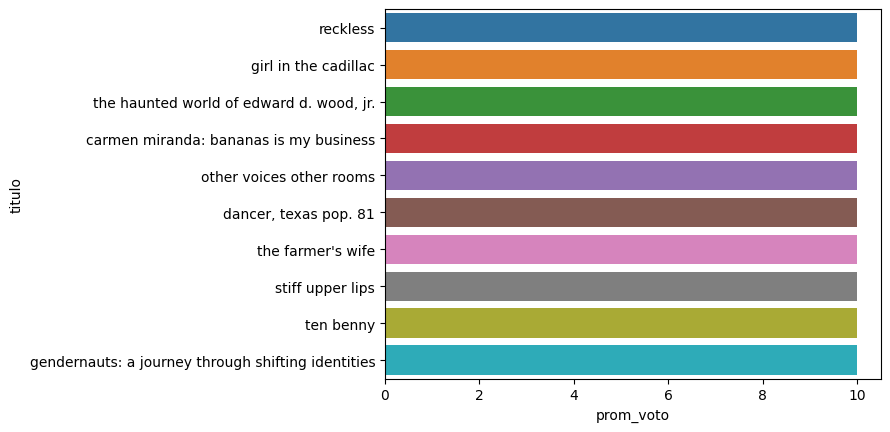

In [103]:
sns.barplot(x='prom_voto', y=top10_len.index, data = top10_len)

<AxesSubplot: xlabel='prom_voto', ylabel='titulo'>

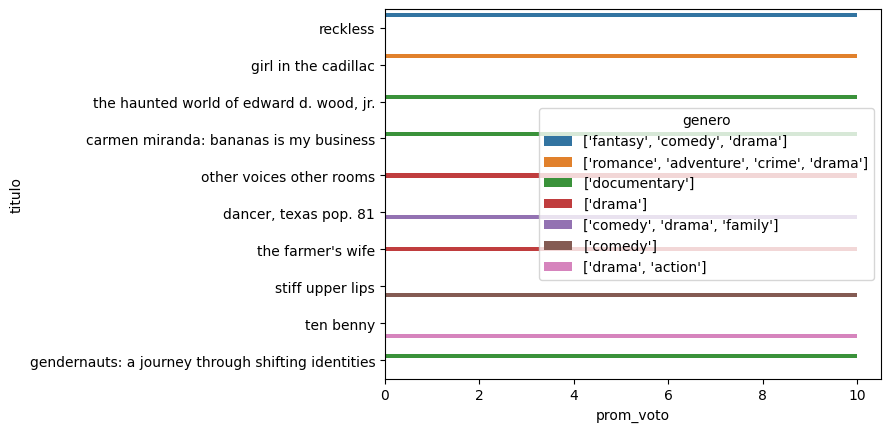

In [104]:
sns.barplot(x='prom_voto', y=top10_len.index, data = top10_len, hue='genero')

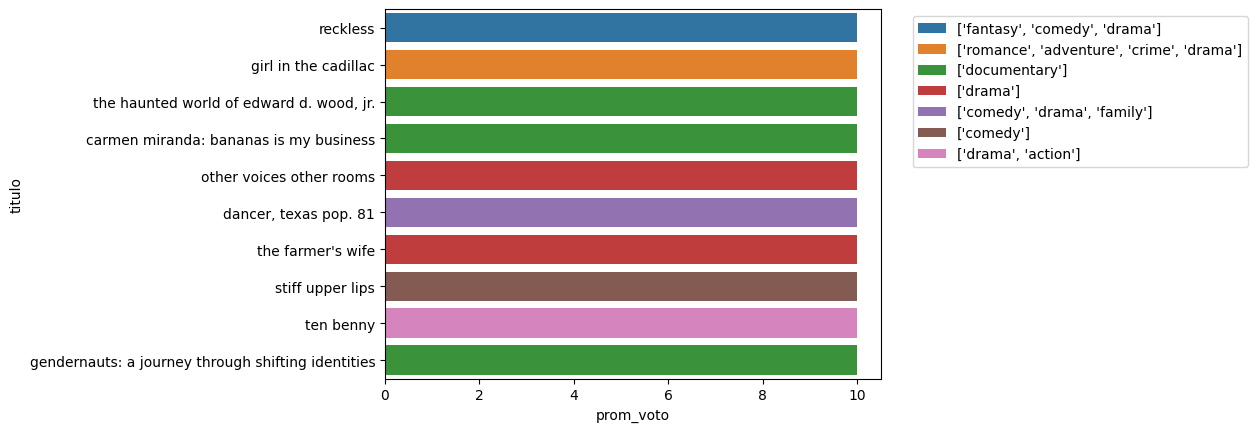

In [105]:
sns.barplot(x='prom_voto', y=top10_len.index, data = top10_len, hue='genero', dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

# 9. Mostrar los 10 títulos de películas con mayores ingresos

In [106]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [107]:
df1.nlargest(10,'ganancia (mill)')

coleccion  presupuesto (mill)                    genero      id idioma_original                  sinopsis     popular            cia_productora                      pais     estreno  ganancia (mill)  duracion            idioma_hablado    estado                      lema                    titulo  prom_voto  anio        mes        dia  retorno
14545         avatar collection               237.0  ['action', 'adventure...   19995              en  in the 22nd century, ...  185.070892  ['ingenious film part...  ['united states of am...  2009-12-10      2787.965087     162.0    ['english', 'espanol']  released  enter the world of pa...                    avatar        7.2  2009  diciembre     jueves    11.76
26525      star wars collection               245.0  ['action', 'adventure...  140607              en  thirty years after de...   31.626013  ['lucasfilm', 'trueno...  ['united states of am...  2015-12-15      2068.223624     136.0               ['english']  released  every generation has ...  star wars: the force ...        7.5  2015  diciembre     martes     8.44
1637                                          200.0  ['drama', 'romance', ...     597              en  84 years later, a 101...   26.889070  ['paramount pictures'...  ['united states of am...  1997-11-18      1845.034188     194.0  ['english', 'francais...  released  nothing on earth coul...                   titanic        7.5  1997  noviembre     martes     9.23
17807   the avengers collection               220.0  ['science fiction', '...   24428              en  when an unexpected en...   89.887648  ['paramount pictures'...  ['united states of am...  2012-04-25      1519.557910     143.0               ['english']  released   some assembly required.              the avengers        7.4  2012      abril  miercoles     6.91
25054  jurassic park collection               150.0  ['action', 'adventure...  135397              en  twenty-two years afte...   32.790475  ['universal studios',...  ['united states of am...  2015-06-09      1513.528810     124.0               ['english']  released         the park is open.            jurassic world        6.5  2015      junio     martes    10.09
28799  the fast and the furi...               190.0                ['action']  168259              en  deckard shaw seeks re...   27.275687  ['universal pictures'...  ['japan', 'united sta...  2015-04-01      1506.249360     137.0               ['english']  released       vengeance hits home                 furious 7        7.3  2015      abril  miercoles     7.93
26528   the avengers collection               280.0  ['action', 'adventure...   99861              en  when tony stark tries...   37.379420  ['marvel studios', 'p...  ['united states of am...  2015-04-22      1405.403694     141.0               ['english']  released       a new age has come.   avengers: age of ultron        7.3  2015      abril  miercoles     5.02
17426   harry potter collection               125.0  ['family', 'fantasy',...   12445              en  harry, ron and hermio...   24.990737  ['warner bros.', 'hey...  ['united kingdom', 'u...  2011-07-07      1342.000000     130.0               ['english']  released         it all ends here.  harry potter and the ...        7.9  2011      julio     jueves    10.74
22084         frozen collection               150.0  ['animation', 'advent...  109445              en  young princess anna o...   24.248243  ['walt disney picture...  ['united states of am...  2013-11-27      1274.219009     102.0               ['english']  released  only the act of true ...                    frozen        7.3  2013  noviembre  miercoles     8.49
42151                                         160.0  ['family', 'fantasy',...  321612              en  a live-action adaptat...  287.253654  ['walt disney picture...  ['united kingdom', 'u...  2017-03-16      1262.886337     129.0               ['english']  released             be our guest.      beauty and the beast        6.8  2017      marzo     j

In [108]:
df1.nlargest(10,'ganancia (mill)')['titulo']

14545                      avatar
26525    star wars: the force ...
1637                      titanic
17807                the avengers
25054              jurassic world
28799                   furious 7
26528     avengers: age of ultron
17426    harry potter and the ...
22084                      frozen
42151        beauty and the beast
Name: titulo, dtype: object

In [109]:
df1.nlargest(10,'ganancia (mill)')[['titulo','ganancia (mill)']]

titulo  ganancia (mill)
14545                    avatar      2787.965087
26525  star wars: the force ...      2068.223624
1637                    titanic      1845.034188
17807              the avengers      1519.557910
25054            jurassic world      1513.528810
28799                 furious 7      1506.249360
26528   avengers: age of ultron      1405.403694
17426  harry potter and the ...      1342.000000
22084                    frozen      1274.219009
42151      beauty and the beast      1262.886337

In [110]:
top_10=df1.nlargest(10,'ganancia (mill)')[['titulo','ganancia (mill)']].set_index('titulo')
top_10

ganancia (mill)
titulo                                    
avatar                         2787.965087
star wars: the force a...      2068.223624
titanic                        1845.034188
the avengers                   1519.557910
jurassic world                 1513.528810
furious 7                      1506.249360
avengers: age of ultron        1405.403694
harry potter and the d...      1342.000000
frozen                         1274.219009
beauty and the beast           1262.886337

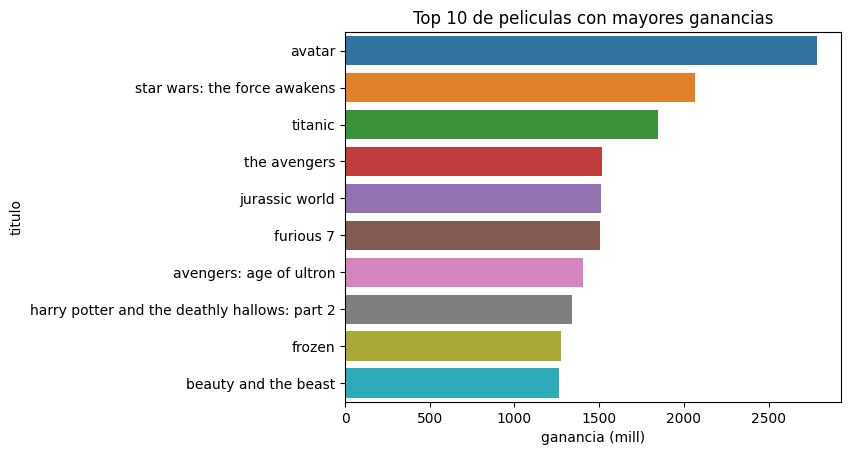

In [111]:
sns.barplot(x='ganancia (mill)', y = top_10.index,data=top_10)
plt.title("Top 10 de peliculas con mayores ganancias")
plt.show()

# 10. Encontrar la calificación promedio de las películas por año

In [112]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [113]:
df1.groupby('anio')['prom_voto'].mean()

anio
1874    6.000000
1878    6.200000
1883    5.400000
1887    4.100000
1888    5.150000
          ...   
2015    6.052125
2016    6.205820
2017    6.319247
2018    5.624176
2020    5.624176
Name: prom_voto, Length: 135, dtype: float64

In [114]:
df1.groupby('anio')['prom_voto'].mean().sort_values(ascending=False)

anio
1902    6.900000
1923    6.770616
1924    6.754466
1928    6.642374
1921    6.493107
          ...   
1888    5.150000
1890    4.740000
1891    4.233333
1887    4.100000
1892    3.466667
Name: prom_voto, Length: 135, dtype: float64

# 11. ¿La calificación afecta los ingresos?

In [115]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

<AxesSubplot: xlabel='prom_voto', ylabel='ganancia (mill)'>

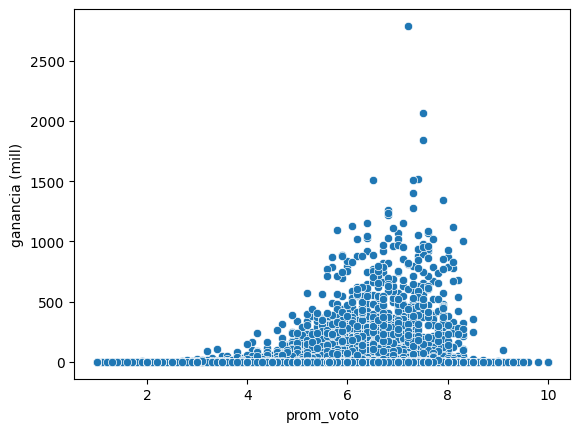

In [117]:
sns.scatterplot(x='prom_voto', y ='ganancia (mill)', data=df1)

# 12. clasificar las películas según las calificaciones (excelente, bueno y promedio)

In [124]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [125]:
def promedio_voto(promedio_voto):
    promedio_voto = pd.to_numeric(promedio_voto, errors='coerce')  # Convertir a tipo numérico
    if promedio_voto >= 7.0:
        return "Excelente"
    elif promedio_voto >= 6.0:
        return "Bueno"
    else:
        return "Promedio"

In [126]:
df1['prom_voto'] = df1['prom_voto'].apply(promedio_voto)
df1.head()

/tmp/ipykernel_245722/949671413.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



coleccion  presupuesto (mill)                    genero     id idioma_original                  sinopsis    popular            cia_productora                      pais     estreno  ganancia (mill)  duracion           idioma_hablado    estado                      lema                    titulo prom_voto  anio        mes      dia  retorno
0      toy story collection                30.0  ['animation', 'comedy...    862              en  led by woody, andy's ...  21.946943  ['pixar animation stu...  ['united states of am...  1995-10-30       373.554033      81.0              ['english']  released                                           toy story  Promedio  1995    octubre    lunes    12.45
1                                          65.0  ['adventure', 'fantas...   8844              en  when siblings judy an...  17.015539  ['tristar pictures', ...  ['united states of am...  1995-12-15       262.797249     104.0  ['english', 'francais']  released  roll the dice and unl...                   jumanji  Promedio  1995  diciembre  viernes     4.04
2  grumpy old men collec...                 0.0     ['romance', 'comedy']  15602              en  a family wedding reig...  11.712900  ['warner bros.', 'lan...  ['united states of am...  1995-12-22         0.000000     101.0              ['english']  released  still yelling. still ...          grumpier old men  Promedio  1995  diciembre  viernes     0.00
3                                          16.0  ['comedy', 'drama', '...  31357              en  cheated on, mistreate...   3.859495  ['twentieth century f...  ['united states of am...  1995-12-22        81.452156     127.0              ['english']  released  friends are the peopl...         waiting to exhale  Promedio  1995  diciembre  viernes     5.09
4  father of the bride c...                 0.0                ['comedy']  11862              en  just when george bank...   8.387519  ['sandollar productio...  ['united states of am...  1995-02-10        76.578911     106.0              ['english']  released  just when his world i...  father of the bride p...  Promedio  1995    febrero  viernes     0.00

# 13. Contar el número de películas de acción

In [127]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [129]:
df1['genero'].dtype

dtype('O')

In [130]:
df1['genero'] = df1['genero'].fillna('')
df1_action=df1[df1['genero'].str.contains('action', case=False)]
df1_action

/tmp/ipykernel_245722/323169046.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



coleccion  presupuesto (mill)                    genero     id idioma_original                  sinopsis    popular            cia_productora                      pais     estreno  ganancia (mill)  duracion            idioma_hablado    estado                      lema            titulo prom_voto  anio        mes        dia  retorno
5                                           60.0  ['action', 'crime', '...    949              en  obsessive master thie...  17.924927  ['regency enterprises...  ['united states of am...  1995-12-15       187.436818     170.0    ['english', 'espanol']  released  a los angeles crime saga              heat  Promedio  1995  diciembre    viernes     3.12
7                                            0.0  ['action', 'adventure...  45325              en  a mischievous young b...   2.561161  ['walt disney pictures']  ['united states of am...  1995-12-22         0.000000      97.0    ['english', 'deutsch']  released    the original bad boys.      tom and huck  Promedio  1995  diciembre    viernes     0.00
8                                           35.0  ['action', 'adventure...   9091              en  international action ...   5.231580  ['universal pictures'...  ['united states of am...  1995-12-22        64.350171     106.0               ['english']  released  terror goes into over...      sudden death  Promedio  1995  diciembre    viernes     1.84
9      james bond collection                58.0  ['adventure', 'action...    710              en  james bond must unmas...  14.686036  ['united artists', 'e...  ['united kingdom', 'u...  1995-11-16       352.194034     130.0  ['english', 'pusskii'...  released  no limits. no fears. ...         goldeneye  Promedio  1995  noviembre     jueves     6.07
14                                          98.0   ['action', 'adventure']   1408              en  morgan adams and her ...   7.284477  ['le studio canal+', ...  ['france', 'germany',...  1995-12-22        10.017322     119.0      ['english', 'latin']  released  the course has been s...  cutthroat island  Promedio  1995  diciembre    viernes     0.10
...                      ...                 ...                       ...    ...             ...                       ...        ...                       ...                       ...         ...              ...       ...                       ...       ...                       ...               ...       ...   ...        ...        ...      ...
45339                                        0.0  ['action', 'romance',...  45029              en  buxom do-gooders donn...   1.092445      ['malibu bay films']  ['united states of am...  1993-10-27         0.000000      97.0               ['english']  released  they're sexy. they're...       fit to kill  Promedio  1993    octubre  miercoles     0.00
45347                                        0.0  ['action', 'mystery',...  45527              en  a stranger named sila...   1.270832  ['boll kino beteiligu...     ['canada', 'germany']  2010-01-01         0.000000      92.0               ['english']  released            action, horror   the final storm  Promedio  2010      enero    viernes     0.00
45361                                        0.0  ['fantasy', 'action',...  49280              fr  a band-leader has arr...   1.109068     ['star film company']                ['france']  1900-01-01         0.000000       1.0           ['no language']  released                            the one-man band  Promedio  1900      enero      lunes     0.00
45371                                        0.0  ['drama', 'action', '...  30840              en  yet another version o...   5.683753  ['westdeutscher rundf...  ['canada', 'germany',...  1991-05-13         0.000000     104.0               ['english']  released                                  robin hood  Promedio  1991       mayo      lunes     0.00
45373                                        0.0  ['action', 'drama', '...  67758              en  when one of her hits ...   0.903007  

In [132]:
len(df1[df1['genero'].str.contains('action', case=False)])

6589

# 14. Encontrar valores únicos de género

In [133]:
df1.columns

Index(['coleccion', 'presupuesto (mill)', 'genero', 'id', 'idioma_original',
       'sinopsis', 'popular', 'cia_productora', 'pais', 'estreno',
       'ganancia (mill)', 'duracion', 'idioma_hablado', 'estado', 'lema',
       'titulo', 'prom_voto', 'anio', 'mes', 'dia', 'retorno'],
      dtype='object')

In [135]:
df1['genero']

0        ['animation', 'comedy...
1        ['adventure', 'fantas...
2           ['romance', 'comedy']
3        ['comedy', 'drama', '...
4                      ['comedy']
                   ...           
45371    ['drama', 'action', '...
45372                   ['drama']
45373    ['action', 'drama', '...
45374                            
45375                            
Name: genero, Length: 45359, dtype: object

In [140]:
def parse_genero(string):
    try:
        genero = ast.literal_eval(string)
        if isinstance(genero, list):
            return genero
    except (SyntaxError, ValueError):
        pass
    return []

df1['genero'] = df1['genero'].apply(parse_genero)

generos_unicos = df1['genero'].explode().unique()
print(generos_unicos)

['animation' 'comedy' 'family' 'adventure' 'fantasy' 'romance' 'drama'
 'action' 'crime' 'thriller' 'horror' 'history' 'science fiction'
 'mystery' 'war' 'foreign' nan 'music' 'documentary' 'western' 'tv movie']


/tmp/ipykernel_245722/1703723803.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
generos_unicos

array(['animation', 'comedy', 'family', 'adventure', 'fantasy', 'romance',
       'drama', 'action', 'crime', 'thriller', 'horror', 'history',
       'science fiction', 'mystery', 'war', 'foreign', nan, 'music',
       'documentary', 'western', 'tv movie'], dtype=object)

In [142]:
len(generos_unicos)

21

# 15. Cuantas peliculas de cada genero se hicieron

In [143]:
# Cuenta las películas de cada género
genero_counts = df1['genero'].explode().value_counts()

# Imprime los resultados
print(genero_counts)

drama              20243
comedy             13177
thriller            7616
romance             6731
action              6589
horror              4669
crime               4304
documentary         3920
adventure           3492
science fiction     3039
family              2768
mystery             2462
fantasy             2311
animation           1930
foreign             1619
music               1598
history             1397
war                 1323
western             1042
tv movie             766
Name: genero, dtype: int64


In [ ]:
# GUARDAR EL ARCHIVO LIMPIO

In [17]:
df.to_csv('movies_EDA.csv', index=False, encoding='utf-8')